# Which US cities Americans are fleeing -- and which are luring more

So, I wanted to look at public housing in Atlanta -- and maybe it's affect on homelessness -- but after spending all of lab on Monday and a good chunk on Tuesday searching online and calling the housing authority, I abandoned this due to lack of data (or at least, a lack of ability to find it).

I pivoted quickly to Census data on population change in US cities with 50,000 or more people. I searched for a table of what I wanted on the Census website and then exported it as a csv. I opened the csv in Sublime and chopped off a garbage topline of weird metavalues, then opened it here with pandas. I dropped columns I didn't need and renamed those I did. I also created a new column for state to have the option to do analysis at that level.

The results are actually marginally interesting, at least to me. Four out of the five that saw the biggest number drop in population are major American cities. Three out of the five that added the most are in Texas.

My "nice-to-have" improvements would be more data and analysis: I'd like to try to get at why by probing number of jobs added (or lost) and other economic factors in the cities I'm looking at. I've also located Census on population change that compares the current number to 2010 levels, and the largest slice of time would likely produce more interesting results. More analysis would be needed of course to pay off/confirm using "fleeing" and "luring" in the above headline.

In [1]:
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv("CLEANER_pop_change.csv")

In [3]:
df.shape

(758, 12)

In [4]:
df

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Rank,Geography.1,Geography.2,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,"Change, 2016 to 2017 - Number","Change, 2016 to 2017 - Percent [1]"
0,0100000US,NaN,United States,1620000US4827684,4827684,1,"United States - Frisco city, Texas","Frisco city, Texas",163816,177286,13470,8.2
1,0100000US,NaN,United States,1620000US4850820,4850820,2,"United States - New Braunfels city, Texas","New Braunfels city, Texas",73319,79152,5833,8.0
2,0100000US,NaN,United States,1620000US4857176,4857176,3,"United States - Pflugerville city, Texas","Pflugerville city, Texas",59507,63359,3852,6.5
3,0100000US,NaN,United States,1620000US1902305,1902305,4,"United States - Ankeny city, Iowa","Ankeny city, Iowa",58639,62416,3777,6.4
4,0100000US,NaN,United States,1620000US0407940,407940,5,"United States - Buckeye city, Arizona","Buckeye city, Arizona",64639,68453,3814,5.9
5,0100000US,NaN,United States,1620000US4829336,4829336,6,"United States - Georgetown city, Texas","Georgetown city, Texas",67068,70685,3617,5.4
6,0100000US,NaN,United States,1620000US0812415,812415,7,"United States - Castle Rock town, Colorado","Castle Rock town, Colorado",59255,62276,3021,5.1
7,0100000US,NaN,United States,1620000US4727740,4727740,8,"United States - Franklin city, Tennessee","Franklin city, Tennessee",74685,78321,3636,4.9
8,0100000US,NaN,United States,1620000US4845744,4845744,9,"United States - McKinney city, Texas","McKinney city, Texas",172984,181330,8346,4.8
9,0100000US,NaN,United States,1620000US1652120,1652120,10,"United States - Meridian city, Idaho","Meridian city, Idaho",95436,99926,4490,4.7


In [5]:
# cl_df = cl_df.drop(['name'], axis=1)
# cols = ['name', 'court', 'incumbent', 'vacancy_date', 'vacancy_reason', 'nom_date', 'confirm_date']
# df = df[cols]
# df
columns = df.columns.values.tolist()
columns

['Id',
 'Id2',
 'Geography',
 'Target Geo Id',
 'Target Geo Id2',
 'Rank',
 'Geography.1',
 'Geography.2',
 'Population Estimate (as of July 1) - 2016',
 'Population Estimate (as of July 1) - 2017',
 'Change, 2016 to 2017 - Number',
 'Change, 2016 to 2017 - Percent [1]']

In [6]:
my_cols = ['Geography.2', 'Population Estimate (as of July 1) - 2016', 'Population Estimate (as of July 1) - 2017', 'Change, 2016 to 2017 - Number', 'Change, 2016 to 2017 - Percent [1]']

In [7]:
df = df[my_cols]
df.head()

,Geography.2,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,"Change, 2016 to 2017 - Number","Change, 2016 to 2017 - Percent [1]"
0,"Frisco city, Texas",163816,177286,13470,8.2
1,"New Braunfels city, Texas",73319,79152,5833,8.0
2,"Pflugerville city, Texas",59507,63359,3852,6.5
3,"Ankeny city, Iowa",58639,62416,3777,6.4
4,"Buckeye city, Arizona",64639,68453,3814,5.9


In [8]:
df.rename(index=str, columns={"Geography.2": "City"}, inplace=True)
df.head()

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,City,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,"Change, 2016 to 2017 - Number","Change, 2016 to 2017 - Percent [1]"
0,"Frisco city, Texas",163816,177286,13470,8.2
1,"New Braunfels city, Texas",73319,79152,5833,8.0
2,"Pflugerville city, Texas",59507,63359,3852,6.5
3,"Ankeny city, Iowa",58639,62416,3777,6.4
4,"Buckeye city, Arizona",64639,68453,3814,5.9


In [9]:
df.rename(index=str, columns={"Population Estimate (as of July 1) - 2016": "2016_Pop"}, inplace=True)

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
df.rename(index=str, columns={"Population Estimate (as of July 1) - 2017": "2017_Pop"}, inplace=True)

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [11]:
df.rename(index=str, columns={"Change, 2016 to 2017 - Number": "Pop_Change"}, inplace=True)

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
df.rename(index=str, columns={"Change, 2016 to 2017 - Percent [1]": "Percent_Change"}, inplace=True)

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
df['City'] = df.City.str.replace(" city", "")

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df['State'] = df.City.str.split(", ").str[1]

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State
0,"Frisco, Texas",163816,177286,13470,8.2,Texas
1,"New Braunfels, Texas",73319,79152,5833,8.0,Texas
2,"Pflugerville, Texas",59507,63359,3852,6.5,Texas
3,"Ankeny, Iowa",58639,62416,3777,6.4,Iowa
4,"Buckeye, Arizona",64639,68453,3814,5.9,Arizona


In [16]:
df.to_csv("my_pop_df.csv", index=False)

In [17]:
df.dtypes

City               object
2016_Pop            int64
2017_Pop            int64
Pop_Change          int64
Percent_Change    float64
State              object
dtype: object

In [18]:
# which US cities gained the most ppl and which lost most?
df.sort_values(by='Percent_Change', ascending=False).head()

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State
0,"Frisco, Texas",163816,177286,13470,8.2,Texas
1,"New Braunfels, Texas",73319,79152,5833,8.0,Texas
2,"Pflugerville, Texas",59507,63359,3852,6.5,Texas
3,"Ankeny, Iowa",58639,62416,3777,6.4,Iowa
4,"Buckeye, Arizona",64639,68453,3814,5.9,Arizona


In [19]:
df.sort_values(by='Percent_Change').head()

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State
757,"Casper, Wyoming",58906,57814,-1092,-1.9,Wyoming
756,"St. Louis, Missouri",313144,308626,-4518,-1.4,Missouri
754,"Peoria, Illinois",114351,112883,-1468,-1.3,Illinois
755,"Enid, Oklahoma",50785,50122,-663,-1.3,Oklahoma
753,"Shreveport, Louisiana",194394,192036,-2358,-1.2,Louisiana


In [39]:
df.sort_values(by='Pop_Change', ascending=False).head()

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State
143,"San Antonio, Texas",1487738,1511946,24208,1.6,Texas
167,"Phoenix, Arizona",1602042,1626078,24036,1.5,Arizona
183,"Dallas, Texas",1322140,1341075,18935,1.4,Texas
82,"Fort Worth, Texas",855504,874168,18664,2.2,Texas
408,"Los Angeles, California",3981116,3999759,18643,0.5,California


In [21]:
df.sort_values(by='Pop_Change').head()

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State
742,"Baltimore, Maryland",616958,611648,-5310,-0.9,Maryland
756,"St. Louis, Missouri",313144,308626,-4518,-1.4,Missouri
611,"Chicago, Illinois",2720275,2716450,-3825,-0.1,Illinois
749,"Anchorage municipality, Alaska",297376,294356,-3020,-1.0,Alaska
741,"Pittsburgh, Pennsylvania",305017,302407,-2610,-0.9,Pennsylvania


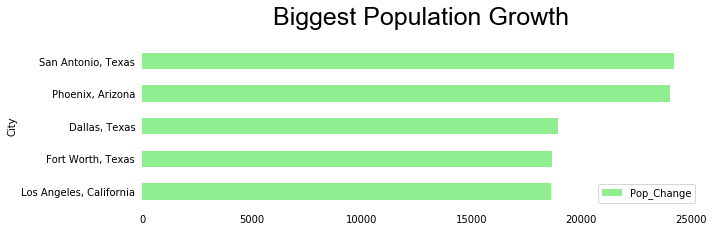

In [107]:
gain_df = df.sort_values(by='Pop_Change', ascending=False).head()
ax = gain_df.sort_values(by='Pop_Change', ascending=True).plot(kind='barh', color='lightgreen', x='City', y='Pop_Change', figsize=(10,3))

ax.set_title("Biggest Population Growth", pad=20)
ax.title.set_fontsize(25)
ax.title.set_fontname("Arial")

ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

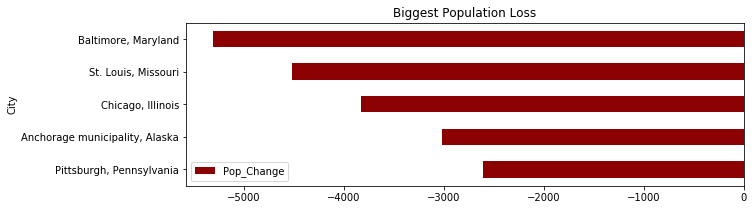

In [23]:
ax2 = df.sort_values(by='Pop_Change').head()
ax2.sort_values(by='Pop_Change', ascending=False).plot(kind='barh', color='darkred', x='City', y='Pop_Change', figsize=(10,3), title="Biggest Population Loss")

In [24]:
# all_gains = df[~df['Pop_Change'].str.contains('-')]
all_gains = df[df['Pop_Change'] > 0]
bigger_cities_by_state = all_gains.State.value_counts()

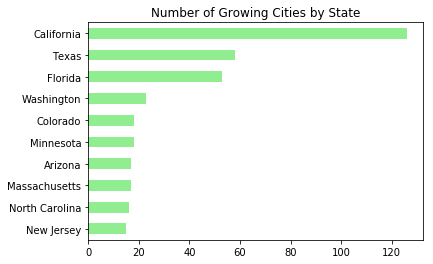

In [25]:
bigger_cities_by_state.head(10).sort_values(ascending=True).plot(kind='barh', color='lightgreen', title='Number of Growing Cities by State')

In [93]:
# bigger_cities_by_state.plot(marker='o', linestyle='')
# # df.plot.scatter('x', 'y')

In [133]:
# eco_df = pd.read_csv("TX_unemploy_CLEAN.csv")
# eco_df.head(10)

In [134]:
TXeco_df = pd.read_excel("UnemploymentReport.xlsx", skiprows=1)
TXeco_df.head()

,FIPS,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,None,Median Household Income (2016),% of State Median HH Income
0,48000,Texas,7.6,8.1,7.8,6.7,6.3,5.1,4.4,4.6,4.3,NaN,56583.0,1.000000
1,48001,"Anderson County, TX",8.7,8.1,7.3,6.3,5.8,4.7,3.9,4.3,3.6,NaN,43967.0,0.777036
2,48003,"Andrews County, TX",7.0,6.2,5.0,4.0,3.8,3.0,3.5,4.7,3.1,NaN,60644.0,1.071771
3,48005,"Angelina County, TX",8.2,8.5,7.9,6.9,6.5,5.2,5.6,5.9,5.1,NaN,43658.0,0.771575
4,48007,"Aransas County, TX",6.8,9.2,8.8,7.0,6.6,5.5,5.1,5.6,6.8,NaN,44866.0,0.792924


In [44]:
TXeco_df.shape

(258, 14)

In [56]:
TXeco_df[(TXeco_df.Name == 'Bexar County, TX') | (TXeco_df.Name == 'Dallas County, TX') | (TXeco_df.Name == 'Tarrant County, TX')]

# TXeco_df[(TXeco_df.Name.str.contains("Bexar", na=False)) | (TXeco_df.Name.str.contains("Dallas", na=False)) | (TXeco_df.Name.str.contains("Tarrant", na=False))]

,FIPS,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,None,Median Household Income (2016),% of State Median HH Income
15,48029,"Bexar County, TX",6.7,7.3,7.2,6.3,5.8,4.7,3.8,3.7,3.5,NaN,53170.0,0.939682
57,48113,"Dallas County, TX",8.2,8.6,8.1,7.1,6.6,5.4,4.3,4.0,3.8,NaN,54429.0,0.961932
220,48439,"Tarrant County, TX",7.7,8.1,7.6,6.5,6.0,5.0,4.2,4.0,3.7,NaN,61553.0,1.087836


In [45]:
my_counties = ['Bexar County, TX', 'Dallas County, TX', 'Tarrant County, TX']

In [46]:
TXco_df = TXeco_df[TXeco_df['Name'].isin(my_counties)]
TXco_df

,FIPS,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,None,Median Household Income (2016),% of State Median HH Income
15,48029,"Bexar County, TX",6.7,7.3,7.2,6.3,5.8,4.7,3.8,3.7,3.5,NaN,53170.0,0.939682
57,48113,"Dallas County, TX",8.2,8.6,8.1,7.1,6.6,5.4,4.3,4.0,3.8,NaN,54429.0,0.961932
220,48439,"Tarrant County, TX",7.7,8.1,7.6,6.5,6.0,5.0,4.2,4.0,3.7,NaN,61553.0,1.087836


In [64]:
TXco_df['City'] = ['San Antonio, Texas', 'Dallas, Texas', 'Fort Worth, Texas']

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
TXco_df

,FIPS,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,None,Median Household Income (2016),% of State Median HH Income,City
15,48029,"Bexar County, TX",6.7,7.3,7.2,6.3,5.8,4.7,3.8,3.7,3.5,NaN,53170.0,0.939682,"San Antonio, Texas"
57,48113,"Dallas County, TX",8.2,8.6,8.1,7.1,6.6,5.4,4.3,4.0,3.8,NaN,54429.0,0.961932,"Dallas, Texas"
220,48439,"Tarrant County, TX",7.7,8.1,7.6,6.5,6.0,5.0,4.2,4.0,3.7,NaN,61553.0,1.087836,"Fort Worth, Texas"


In [66]:
addTX_df = pd.merge(ax, TXco_df, on='City', how='outer')
addTX_df

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State,FIPS,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,None,Median Household Income (2016),% of State Median HH Income
0,"San Antonio, Texas",1487738,1511946,24208,1.6,Texas,48029,"Bexar County, TX",6.7,7.3,7.2,6.3,5.8,4.7,3.8,3.7,3.5,NaN,53170.0,0.939682
1,"Phoenix, Arizona",1602042,1626078,24036,1.5,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Dallas, Texas",1322140,1341075,18935,1.4,Texas,48113,"Dallas County, TX",8.2,8.6,8.1,7.1,6.6,5.4,4.3,4.0,3.8,NaN,54429.0,0.961932
3,"Fort Worth, Texas",855504,874168,18664,2.2,Texas,48439,"Tarrant County, TX",7.7,8.1,7.6,6.5,6.0,5.0,4.2,4.0,3.7,NaN,61553.0,1.087836
4,"Los Angeles, California",3981116,3999759,18643,0.5,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
CAeco_df = pd.read_excel("CAunemploymentReport.xlsx", skiprows=1)

In [72]:
LACo_df = CAeco_df[CAeco_df.Name == "Los Angeles County, CA"]
LACo_df

,FIPS,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,None,Median Household Income (2016),% of State Median HH Income
19,06037,"Los Angeles County, CA",11.6,12.5,12.2,10.9,9.8,8.3,6.6,5.3,4.7,NaN,61308.0,0.905383


In [ ]:
# Sophie's idea:
# if df['name'] == 'California':
#     df['FIPS'] = LACo_df['FIPS']
#     df['2009'] = LACo_df['2009']
#     df['2010'] = LACo_df['2010']

In [73]:
LACo_df['City'] = "Los Angeles, California"
LACo_df

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,FIPS,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,None,Median Household Income (2016),% of State Median HH Income,City
19,06037,"Los Angeles County, CA",11.6,12.5,12.2,10.9,9.8,8.3,6.6,5.3,4.7,NaN,61308.0,0.905383,"Los Angeles, California"


In [111]:
merged = addTX_df.merge(LACo_df, left_on='City', right_on='City')
merged

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State,FIPS _x,Name_x,2009_x,2010_x,...,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,None_y,Median Household Income (2016)_y,% of State Median HH Income_y
0,"Los Angeles, California",3981116,3999759,18643,0.5,California,NaN,NaN,NaN,NaN,...,12.2,10.9,9.8,8.3,6.6,5.3,4.7,NaN,61308.0,0.905383


In [125]:
# merged_columns = merged.columns.values.tolist()
# merged_columns

In [124]:
merged['FIPS _x'].fillna(merged['FIPS _y'], inplace=True)
merged['Name_x'].fillna(merged['Name_y'], inplace=True)
merged['2009_x'].fillna(merged['2009_y'], inplace=True)
merged['2010_x'].fillna(merged['2010_y'], inplace=True)
merged['2011_x'].fillna(merged['2011_y'], inplace=True)
merged['2012_x'].fillna(merged['2012_y'], inplace=True)
merged['2013_x'].fillna(merged['2013_y'], inplace=True)
merged['2014_x'].fillna(merged['2014_y'], inplace=True)
merged['2015_x'].fillna(merged['2015_y'], inplace=True)
merged['2016_x'].fillna(merged['2016_y'], inplace=True)
merged['2017_x'].fillna(merged['2017_y'], inplace=True)
merged['None_x'].fillna(merged['None_y'], inplace=True)
merged['Median Household Income (2016)_x'].fillna(merged['Median Household Income (2016)_y'], inplace=True)
merged['% of State Median HH Income_x'].fillna(merged['% of State Median HH Income_y'], inplace=True)
merged

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State,FIPS _x,Name_x,2009_x,2010_x,...,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,None_y,Median Household Income (2016)_y,% of State Median HH Income_y
0,"Los Angeles, California",3981116,3999759,18643,0.5,California,06037,"Los Angeles County, CA",11.6,12.5,...,12.2,10.9,9.8,8.3,6.6,5.3,4.7,NaN,61308.0,0.905383


In [132]:
# RERUN FROM TOP TO RECREATE THE addTX_df BEFORE I CREATED ALL THESE GARBAGE COLUMNS
# THEN RUN BELOW TO GET EXACT COLUMN NAMES AND ADD VALUES BELOW OR FIRST TRY USING COLUMN NUMBER
# (STARTING AT 0), RATHER THAN THE EXACT NAME; TRY THAT ON ONE CELL FIRST
columns = addTX_df.columns.values.tolist()
columns

['City',
 '2016_Pop',
 '2017_Pop',
 'Pop_Change',
 'Percent_Change',
 'State',
 'FIPS ',
 'Name',
 '2009',
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 '2017',
 None,
 'Median Household Income (2016)',
 '% of State Median HH Income',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [130]:
# q_df.loc[3, 'last_employer'] = "2015 - present Michigan Supreme Court"
# addTX_df.dtypes
addTX_df.loc[4, 'FIPS '] = '06037'
# addTX_df = addTX_df.drop(['FIPS'], axis=1)

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State,FIPS,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,None,Median Household Income (2016),% of State Median HH Income
0,"San Antonio, Texas",1487738,1511946,24208,1.6,Texas,48029,"Bexar County, TX",6.7,7.3,7.2,6.3,5.8,4.7,3.8,3.7,3.5,NaN,53170.0,0.939682
1,"Phoenix, Arizona",1602042,1626078,24036,1.5,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Dallas, Texas",1322140,1341075,18935,1.4,Texas,48113,"Dallas County, TX",8.2,8.6,8.1,7.1,6.6,5.4,4.3,4.0,3.8,NaN,54429.0,0.961932
3,"Fort Worth, Texas",855504,874168,18664,2.2,Texas,48439,"Tarrant County, TX",7.7,8.1,7.6,6.5,6.0,5.0,4.2,4.0,3.7,NaN,61553.0,1.087836
4,"Los Angeles, California",3981116,3999759,18643,0.5,California,06037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
addTX_df.loc[4, 'Name'] = 'Los Angeles County, CA'
addTX_df.loc[4, '2009'] = 11.6
addTX_df.loc[4, '2010'] = 12.5
addTX_df.loc[4, '2011'] = 12.2
addTX_df.loc[4, '2012'] = 10.9
addTX_df.loc[4, '2013'] = 9.8
addTX_df.loc[4, '2014'] = 8.3
addTX_df.loc[4, '2015'] = 6.6
addTX_df.loc[4, '2016'] = 5.3
addTX_df.loc[4, '2017'] = 4.7
addTX_df.loc[4, 'Median Household Income (2016)'] = 61308.0
addTX_df.loc[4, '% of State Median HH Income'] = 0.905383
addTX_df

,City,2016_Pop,2017_Pop,Pop_Change,Percent_Change,State,FIPS,Name,2009,2010,...,None,Median Household Income (2016),% of State Median HH Income,2010,2011,2012,2013,2014,2015,2016
0,"San Antonio, Texas",1487738,1511946,24208,1.6,Texas,48029,"Bexar County, TX",6.7,7.3,...,NaN,53170.0,0.939682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Phoenix, Arizona",1602042,1626078,24036,1.5,Arizona,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Dallas, Texas",1322140,1341075,18935,1.4,Texas,48113,"Dallas County, TX",8.2,8.6,...,NaN,54429.0,0.961932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Fort Worth, Texas",855504,874168,18664,2.2,Texas,48439,"Tarrant County, TX",7.7,8.1,...,NaN,61553.0,1.087836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Los Angeles, California",3981116,3999759,18643,0.5,California,06037,"Los Angeles County, CA",11.6,NaN,...,NaN,61308.0,0.905383,12.5,12.2,10.9,9.8,8.3,6.6,5.3


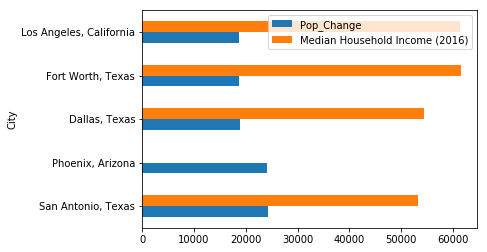

In [135]:
addTX_df.plot(kind='barh', x='City', y=['Pop_Change', 'Median Household Income (2016)'])

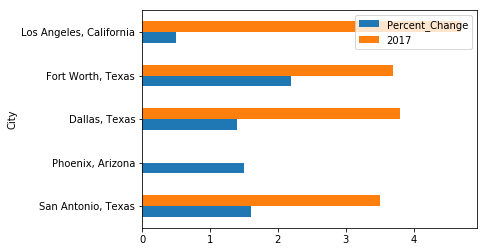

In [136]:
addTX_df.plot(kind='barh', x='City', y=['Percent_Change', '2017'])